In [20]:
%matplotlib inline
from paper_plot import *
import numpy as np
from scipy.interpolate import griddata
from scipy.stats import chi2
import os
precision = 500

In [24]:
ndf = 1.4
calc_ts = lambda x: chi2.ppf(x, ndf, loc=0, scale=1)

In [25]:
calc_ts(0.95)

4.7652400372967438

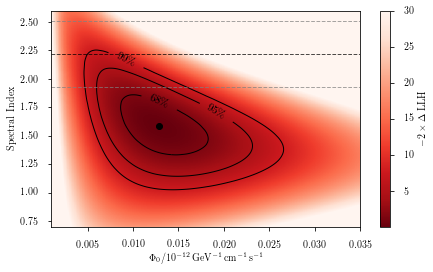

In [26]:
fig, ax = newfig(0.9)
x = []
y = []
z = []
for f in os.listdir('./ts_grid_out/'):
    data = np.load('./ts_grid_out/{}'.format(f))[()]
    y.append(data['index'])
    z.extend(data['ts'])
x = data['norm']
xcoords ,ycoords=np.meshgrid(np.linspace(np.min(x), np.max(x), precision),
                             np.linspace(np.min(y), np.max(y), precision))  
msh_grid = np.meshgrid(x,y)
grid=griddata(zip(msh_grid[0].flatten(), msh_grid[1].flatten()),
              data['best_fit']['TS']-np.array(z),
              (xcoords, ycoords), method='cubic', rescale=True)
cbar = ax.pcolormesh(xcoords,ycoords,grid, cmap=plt.cm.Reds_r, vmax=30)
plt.colorbar(cbar, label = r'$-2\times \Delta$ LLH',)
plt.scatter(data['best_fit']['Prefactor']['value'],data['best_fit']['Index']['value'], color ='k')
CS = ax.contour(xcoords, ycoords, grid,
           [calc_ts(0.68), calc_ts(0.95), calc_ts(0.99)], colors ='k')
plt.clabel(CS, fontsize=11, inline=1)
CS.labelTexts[0].set_text(r'68\%')
CS.labelTexts[1].set_text(r'95\%')
CS.labelTexts[2].set_text(r'99\%')
ax.set_ylabel('Spectral Index')
ax.set_xlabel(r'$\Phi_0/10^{-12}\,\rm{GeV}^{-1}\,\rm{cm}^{-1}\,\rm{s}^{-1}$')
ax.axhline(2.22,linestyle='--', color='black', alpha=0.7)
ax.axhline(2.22+0.29,linestyle='--', color='grey', alpha=0.7)
ax.axhline(2.22-0.29,linestyle='--', color='grey', alpha=0.7)
plt.savefig('contours.png', dpi=300)

In [245]:
CS.labelTexts[0].set_text('test')

In [6]:
print data['best_fit']

{'Index': {'scale': -1.0, 'value': 1.5886959266492147, 'error': 0.2131706954934384}, 'Scale': {'scale': 1.0, 'value': 20000.0, 'error': 0.0}, 'TS': 93.96350074366637, 'Prefactor': {'scale': 1e-12, 'value': 0.012904218143169627, 'error': 0.003909531862901325}}


In [239]:
a = CS.labelTexts

In [231]:
a.set_text('test')

In [241]:
print a[0].set_text('test')

None


In [242]:
print CS.labelTexts

[<matplotlib.text.Text object at 0x17b7c7b50>, <matplotlib.text.Text object at 0x17b7c7f90>, <matplotlib.text.Text object at 0x17b7d2410>]
